In [1]:
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
import pydot
import os

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from IPython.display import display, HTML
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Question I: Revisiting HW4 Bank Classication with New Tools (for dataset A) 

# I. Loading the dataset and performing data preprocessing

> Load a simple dataset and perform some basic data preprocessing to fill out ”unknowns”,
outliers or other invalid data. Explain what preprocessing was performed and why. Also,
change categorical data into numerical features using pandas.get dummies [5].

In [2]:
bank_addidtional_full = "bank-additional.csv"

data = pd.read_csv(bank_addidtional_full, sep = ';', na_values=["unknown"])
df = pd.DataFrame(data)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,NaN,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,NaN,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### We first check for missing values in the dataset. There was 1230 entries as unknown in the catogerical features that were replaced with NaN.

In [3]:
print(df.isnull().sum())
print(df.shape)
df.info()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64
(4119, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4080 non-null object
marital           4108 non-null object
education         3952 non-null object
default           3316 non-null object
housing           4014 non-null object
loan              4014 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          

# NaN values were replaced by the mode of the column

In [4]:
# df = df.fillna(df.mode().iloc[0])
df.drop(['default'], axis=1, inplace=True)

In [5]:
df.head(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,cellular,nov,tue,68,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### According to UCI dataset description, the pdays columns (which represents the number of days passed by after the client was last contacted from a previous campaign) has some 999 values which means that client was not previously contacted. We replaced these 999 values with 0 since samples with 999 entries would be considered as an outliers when it comes to data cleaning. There was found to be 3,959 samples in the pdays column that had to be replaced with 0 instead of 999

999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
9         3
1         3
13        2
18        2
16        2
15        2
0         2
14        1
19        1
21        1
17        1
11        1
Name: pdays, dtype: int64

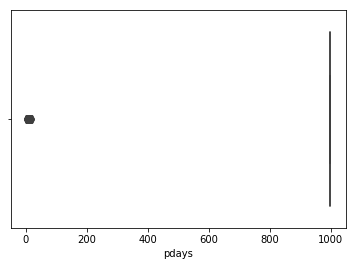

In [6]:
sns.boxplot(x=df['pdays'])
df['pdays'].value_counts()

### To do deal with the massive separation in the values for the pday feature we decided to convert the numerical feature into 5 labels instead:  
- lt_3days
- lt_1week
- lt_1month
- gt_1month
- never

In [7]:
bins = [0,7,14,21,999]
labels=['lt_7days', 'lt_2week', 'lt_3weeks', 'never']
df.pdays = pd.cut(df.pdays, bins, labels=labels, right=True)

### Then we convert all the catogrical columns to numerical columns. Also, dropping the duration column since is a predictive variable according to UCI website and should be dropped if the purpose is to build a realistic model

In [8]:
print(df.shape)
df._get_numeric_data().head()
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.drop(['duration'], axis=1, inplace=True)
df = pd.get_dummies(df,drop_first=True)
display(df.head(5))

(4119, 20)


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
0,30,2,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,39,4,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,25,1,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,38,3,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,47,1,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0


In [9]:
df.shape

(4119, 48)

In [10]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('y')) #Remove y from list
df = df[cols + ['y']] #Create new dataframe with columns in the order you want
display(df.head(5))

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success,y
0,30,2,0,-1.8,92.893,-46.2,1.313,5099.1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
1,39,4,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,25,1,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
3,38,3,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,47,1,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0


In [11]:
# sns.boxplot(x=df['nr.employed'])
# df['cons.conf.idx'].value_counts()
# df['cons.conf.idx'].describe()
# data['pdays'].isna().sum().sum()

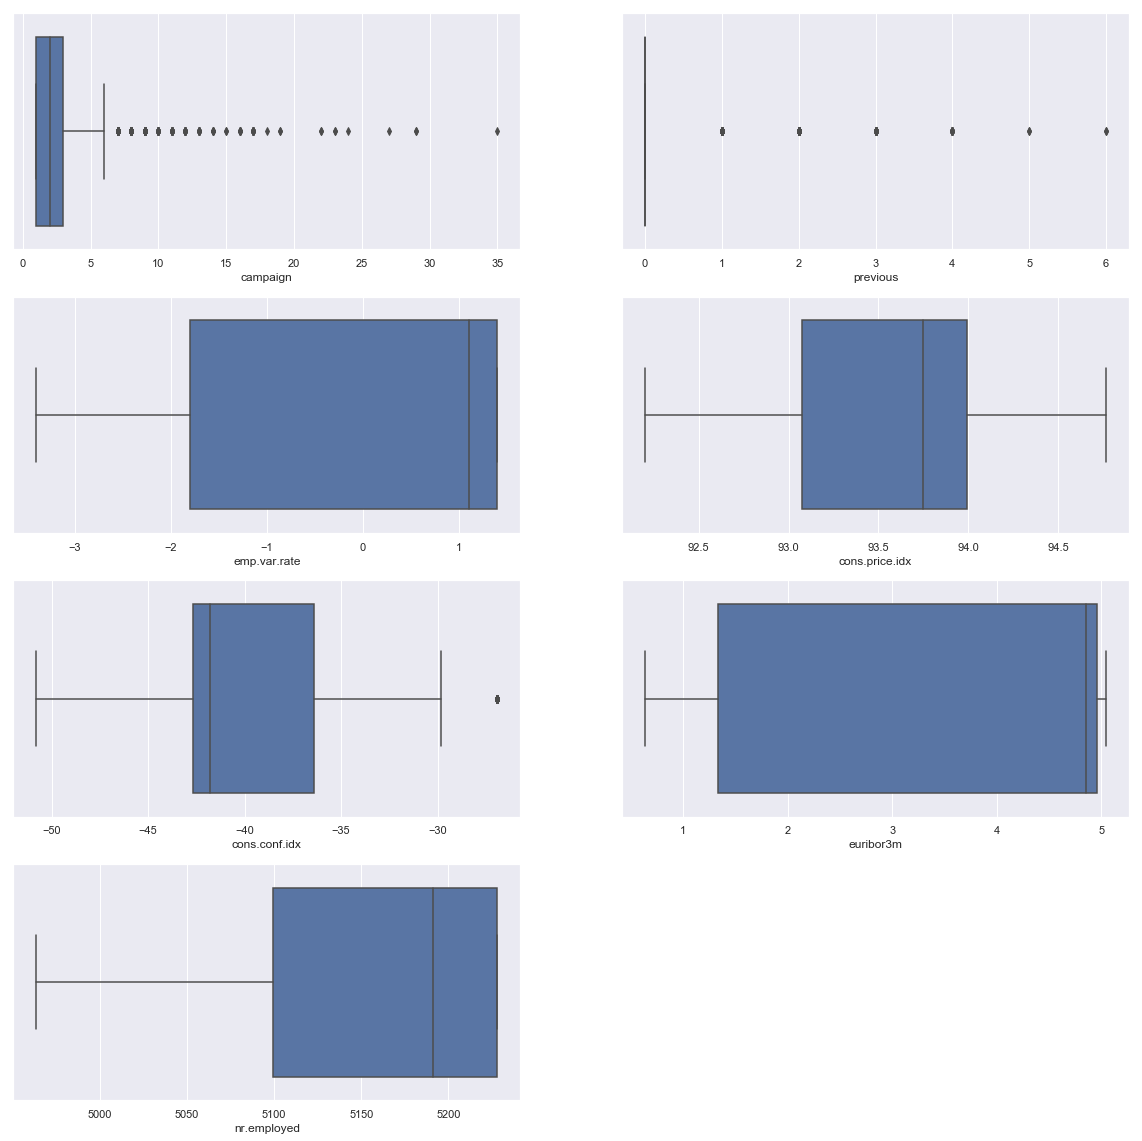

In [12]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

# columns = ('campaign', 'previous', 'emp.var.rate','cons.price.idx','cons.conf.idx',
#           'euribor3m', 'nr.employed')
# x_axis = np.arange(len(algorithms))
# dt_trueP = confusion_matrix(y_test,y_pred_dt)[1][1]
# rf_trueP = confusion_matrix(y_test,RFC_pred)[1][1]
# nn_trueP = confusion_matrix(y_true,y_pred)[1][1]
# trueP = [dt_trueP,rf_trueP,nn_trueP]
 

plt.subplot(4, 2, 1) 
sns.boxplot(x=df['campaign'])

plt.subplot(4, 2, 2)
sns.boxplot(x=df['previous'])

plt.subplot(4, 2, 3)
sns.boxplot(x=df['emp.var.rate'])

plt.subplot(4, 2, 4)
sns.boxplot(x=df['cons.price.idx'])

plt.subplot(4, 2, 5)
sns.boxplot(x=df['cons.conf.idx'])

plt.subplot(4, 2, 6)
sns.boxplot(x=df['euribor3m'])

plt.subplot(4, 2, 7)
sns.boxplot(x=df['nr.employed'])

     
plt.savefig(os.path.join('1-1-boxplots.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


### Based on the boxplots for the numerical values above, there does not seem to be any outliers that need to be dropped from the dataset

# II. Dividing data into training and testing

In [13]:
data = df.copy()
X_orig = df.drop('y',axis=1)
y = df['y']

### **z-score normalization**

In [14]:
# calculatig the z-score normalization using sklearn
X = preprocessing.StandardScaler().fit_transform(X_orig)
X = pd.DataFrame(X)
X.columns = X_orig.columns
display(X.describe())
display(X.head())


C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
count,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03,4.119000e+03
mean,-8.074251e-16,2.177320e-16,-1.002678e-17,-7.982676e-17,1.274684e-14,-2.551033e-16,9.882575e-17,1.698892e-16,-1.925573e-16,7.049741e-17,-1.388048e-15,6.310401e-16,-3.486327e-16,-3.838073e-16,-8.431118e-17,-1.795521e-16,-1.261433e-16,-2.125030e-16,1.760077e-16,-5.390741e-17,1.105574e-15,6.940579e-17,6.265119e-16,1.154655e-16,1.147985e-15,-1.169252e-16,-1.948753e-17,-4.733070e-16,2.126108e-16,-4.049794e-16,5.578204e-16,-1.673825e-16,-3.479723e-17,-4.681858e-16,5.822000e-18,-9.545923e-16,-5.723349e-16,-5.065275e-16,-3.426894e-16,1.227472e-16,-5.482383e-17,-7.842449e-16,5.540334e-16,4.056532e-18,-2.004682e-16,-7.140036e-17,1.087717e-16
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00
min,-2.144432e+00,-5.986595e-01,-3.513560e-01,-2.229776e+00,-2.380037e+00,-2.242241e+00,-1.722850e+00,-2.754338e+00,-5.227439e-01,-1.930549e-01,-1.656450e-01,-2.921909e-01,-2.049230e-01,-2.003784e-01,-3.247692e-01,-1.425206e-01,-4.489713e-01,-1.664170e-01,-1.248353e+00,-6.234894e-01,-2.420677e-01,-4.023906e-01,-5.366493e-01,-1.558321e-02,-3.863607e-01,-6.653811e-01,-1.057746e+00,-4.387829e-01,-7.437523e-01,-4.273186e-01,-7.327880e-02,-4.567568e-01,-3.842830e-01,-1.085851e-01,-7.090389e-01,-3.484632e-01,-1.305260e-01,-1.256303e-01,-5.118091e-01,-5.136970e-01,-5.065164e-01,-4.890498e-01,-6.985155e-02,-4.679510e-02,-4.974309e+00,-2.431270e+00,-1.889585e-01
25%,-7.868050e-01,-5.986595e-01,-3.513560e-01,-1.206054e+00,-8.712637e-01,-4.790790e-01,-1.319592e+00,-9.147793e-01,-5.227439e-01,-1.930549e-01,-1.656450e-01,-2.921909e-01,-2.049230e-01,-2.003784e-01,-3.247692e-01,-1.425206e-01,-4.489713e-01,-1.664170e-01,-1.248353e+00,-6.234894e-01,-2.420677e-01,-4.023906e-01,-5.366493e-01,-1.558321e-02,-3.863607e-01,-6.653811e-01,-1.057746e+00,-4.387829e-01,-7.437523e-01,-4.273186e-01,-7.327880e-02,-4.567568e-01,-3.842830e-01,-1.085851e-01,-7.090389e-01,-3.484632e-01,-1.305260e-01,-1.256303e-01,-5.118091e-01,-5.136970e-01,-5.065164e-01,-4.890498e-01,-6.985155e-02,-4.679510e-02,2.010329e-01,4.113077e-01,-1.889585e-01
50%,-2.049648e-01,-2.092283e-01,-3.513560e-01,6.494413e-01,2.922527e-01,-2.831721e-01,7.128522e-01,3.328625e-01,-5.227439e-0

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
0,-0.980752,-0.209228,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,2.485148,-0.536649,-0.015583,-0.386361,-0.665381,0.945406,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
1,-0.107991,0.569634,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
2,-1.465619,-0.598660,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-0.069852,-0.046795,0.201033,0.411308,-0.188958
3,-0.204965,0.180203,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,2.485148,-0.536649,-0.015583,-0.386361,-0.665381,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
4,0.667795,-0.598660,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,0.945406,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958


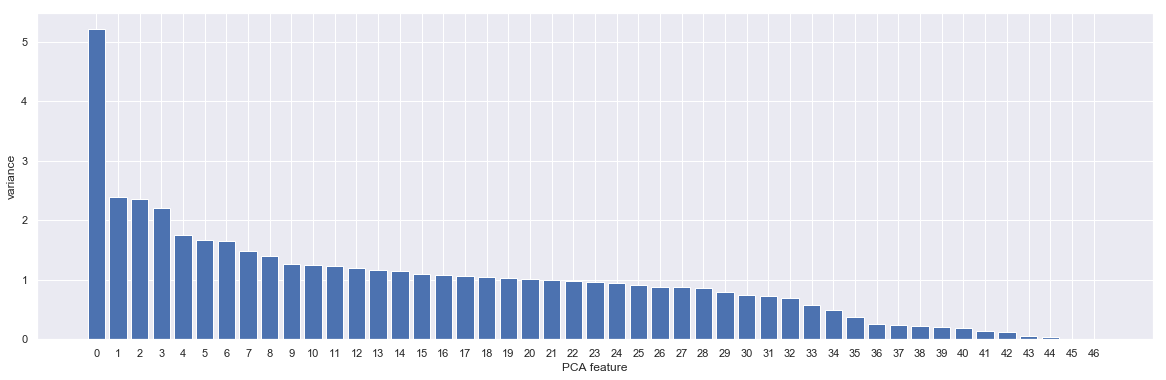

In [15]:
# Create a PCA instance: pca
pca = PCA()

# Fit the data
pca.fit(X)

# Plot the explained variances
n = 70
features = range(pca.n_components_)
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(features[:n], pca.explained_variance_[:n])
ax.set_xlabel('PCA feature')
ax.set_ylabel('variance')
ax.set_xticks(features[:n])
plt.savefig(os.path.join('1-2-pcafeatures.png'), dpi=300, format='png')
plt.show()
eigen_values = pd.Series(pca.explained_variance_)

0.949902190807036


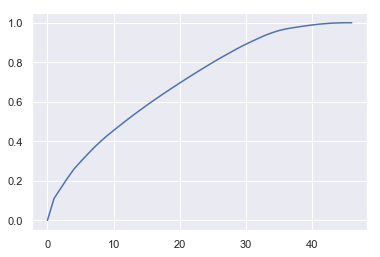

In [16]:
# Determine how many features must be kept to retain 95% of the variance
total_variance = np.sum(eigen_values)
num_pca_features_var_retained = []
for num_components in range(X.shape[1]):
    ratio = np.sum(eigen_values[:num_components]) / total_variance
    num_pca_features_var_retained.append(ratio)

print(num_pca_features_var_retained[34])
plt.plot(num_pca_features_var_retained)

### Based on the eigen values we reduce dimensionality to the first 35 features and retain over 95% of the variance.

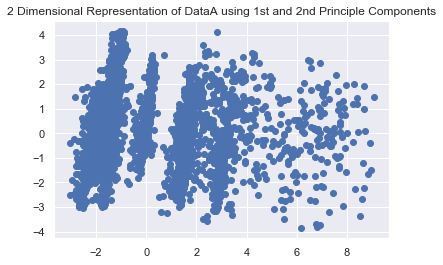

In [17]:
# dimensionality reduction
pca = PCA(n_components=35)

# Fit the data
pca.fit(X)
transformed = pca.transform(X)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys)
plt.title('2 Dimensional Representation of DataA using 1st and 2nd Principle Components')
plt.show()

# X = pd.DataFrame(transformed)
# X.head()

Splitting the data into train and test data. The test data size chosen to be 30%.

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=101)

In [19]:
X_test.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
3489,-0.883778,0.180203,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,2.588255,-0.665381,-1.057746,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,-2.431270,-0.188958
1380,0.473849,-0.209228,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,-0.665381,-1.057746,2.279032,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
1183,-0.592858,-0.209228,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.522744,-0.193055,-0.165645,3.422421,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-0.069852,-0.046795,-4.974309,-2.431270,5.292168
1320,1.734503,0.180203,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
74,-0.883778,-0.598660,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,2.340174,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958


# III. Applying classification: 

# a) Decision Tree

## First, the classifier was instantiated with the default parameters and then was tuned later for comparison

In [20]:
dtree = DecisionTreeClassifier(random_state=101)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## Predicting and evaluating the model

In [21]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[638  94]
 [ 67  25]]


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       732
           1       0.21      0.27      0.24        92

   micro avg       0.80      0.80      0.80       824
   macro avg       0.56      0.57      0.56       824
weighted avg       0.83      0.80      0.82       824



## AUC scores is plotted below to check for overfitting cases with depth of the tree

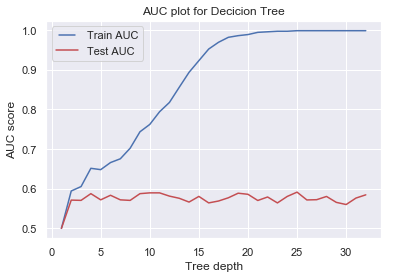

In [22]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for Decicion Tree')
plt.savefig(os.path.join('1-3-DecisionTree_AUC.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

Based on the graph above, we see that when we have a high tree depth we get an overfitting case where the model can predicts the train data perfectly (high area under curve), however, the models fails to generalize and predict new data (test data)

In [23]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

In [24]:
dt_clf = clf_gini.fit(X_train, y_train)

In [25]:
y_pred_dt = dt_clf.predict(X_test)

In [26]:
print("Accuracy is ", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
print(tn, fp, fn, tp)
print('\n')
print(classification_report(y_test,y_pred_dt))

Accuracy is  89.56310679611651
[[724   8]
 [ 78  14]]
724 8 78 14


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.64      0.15      0.25        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.77      0.57      0.59       824
weighted avg       0.87      0.90      0.87       824



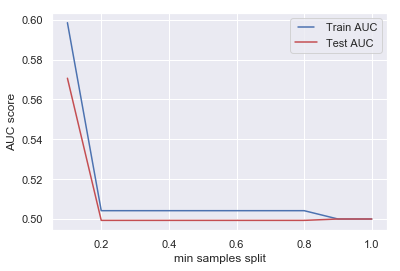

In [27]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [28]:
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# train_results = []
# test_results = []
# for min_samples_leaf in min_samples_leafs:
#    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
#    dt.fit(X_train, y_train)
#    train_pred = dt.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = dt.predict(X_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
# line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('min samples leaf')
# plt.show()

## Tree Visualization using the the built-in visualization from Scikit learn. This requires to install the pydot library and Graphviz.

In [29]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)

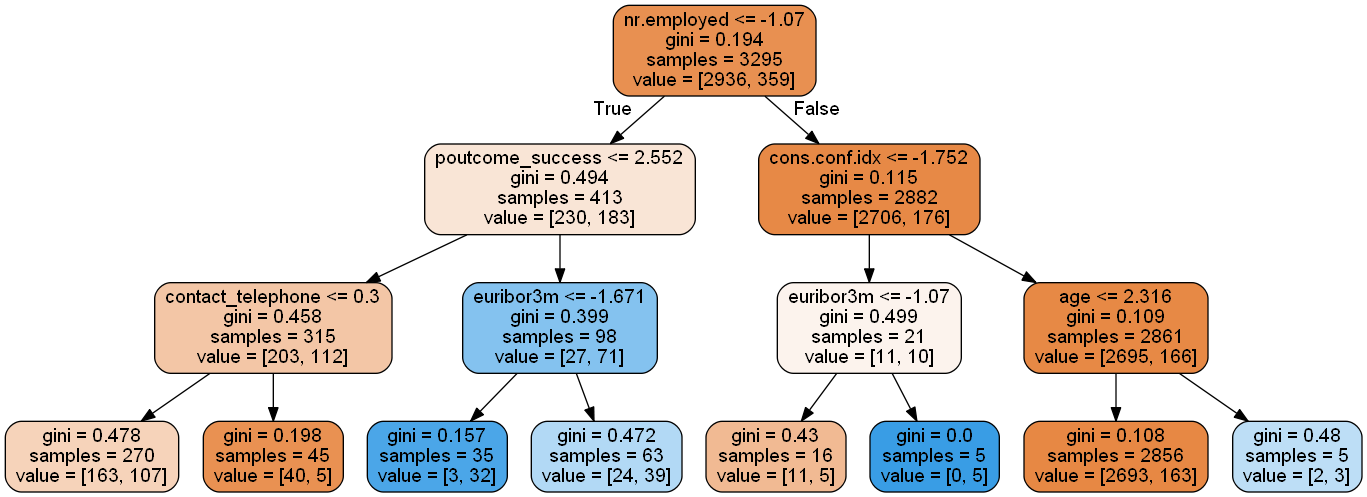

In [30]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 


# b) Random Forests (RF)

We will first fit the model with default parameters and evaluate the performance, then we will tune the parameters and compare the performance. 

In [31]:
rfc = RandomForestClassifier(random_state=101)
rfc_clf = rfc.fit(X_train, y_train)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
rfc_pred = rfc_clf.predict(X_test)

In [33]:
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

Accuracy is  87.98543689320388
[[708  24]
 [ 75  17]]


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       732
           1       0.41      0.18      0.26        92

   micro avg       0.88      0.88      0.88       824
   macro avg       0.66      0.58      0.60       824
weighted avg       0.85      0.88      0.86       824



Similar to DT classifier, we will use the area under curve AUC to evaluate the model. 

In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

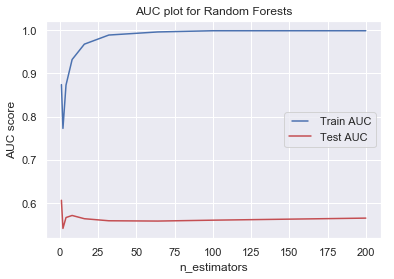

In [35]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(n_estimators).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

The n_estimators in the random forests classifier represents the numsber of trees used in the classifier. Based on the AUC graph above, we see that the highest AUC score for the test data will be around 16 n_estimators. Increasing the n_estimators decreases the test perfomance. 

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

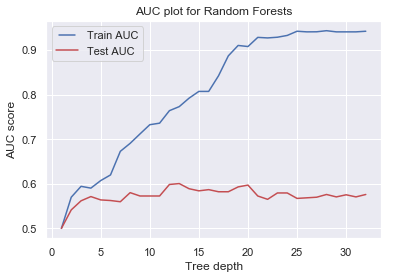

In [36]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(TreeDepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

We see that the higher the tree depth, we get an overfitting case. So a tree depth of 3 wil be chosen

In [37]:
RFC = RandomForestClassifier(n_estimators=16,random_state=101, max_depth=3)
RFC_clf = RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)


print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tunned parameters:")
print("Accuracy is ", accuracy_score(y_test,RFC_pred)*100)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test,RFC_pred))

Results from the default parameters:
Accuracy is  87.98543689320388
[[708  24]
 [ 75  17]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       732
           1       0.41      0.18      0.26        92

   micro avg       0.88      0.88      0.88       824
   macro avg       0.66      0.58      0.60       824
weighted avg       0.85      0.88      0.86       824



Results from the tunned parameters:
Accuracy is  89.56310679611651
[[726   6]
 [ 80  12]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.67      0.13      0.22        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.78      0.56      0.58       824
weighted avg       0.87      0.90      0.86       824



# C) Neural Networks (NN)

Data should be normalized before training the neural network model. This is because the NN model might not converge before the max number of iterations allowed. Also, the multi-layer perception is sensitive to scaling the features. (source: https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html/2)



In [38]:
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

X_nn = df_feat.loc[:,]
y_nn = df['y']
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X,y, test_size=0.20,random_state=101)


C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
y_nn.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [40]:
# Testing with 2 layers with number of neurons:(36,36)
mlp = MLPClassifier(max_iter=1000,random_state=101)

In [ ]:
nn_clf = mlp.fit(X_train_nn,y_train_nn)

predicting and evaluating

In [ ]:
predictions = nn_clf.predict(X_test_nn)

In [ ]:
print("Accuracy is ", accuracy_score(y_test_nn,predictions)*100)
print(confusion_matrix(y_test_nn,predictions))
print("\n")
print(classification_report(y_test_nn,predictions))

Accuracy is  85.55825242718447
[[682  50]
 [ 69  23]]


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       732
           1       0.32      0.25      0.28        92

   micro avg       0.86      0.86      0.86       824
   macro avg       0.61      0.59      0.60       824
weighted avg       0.84      0.86      0.85       824



Tunning the NN parameters using the GridSearchCV method.

In [ ]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(48), (48,48), (48,48,48,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'random_state': [101],
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)

In [ ]:
clf.fit(X_train_nn, y_train_nn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [2000], 'hidden_layer_sizes': [48, (48, 48), (48, 48, 48, 10)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam', 'lbfgs'], 'alpha': [0.0001, 0.05], 'random_state': [101]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (48, 48), 'max_iter': 2000, 'random_state': 101, 'solver': 'sgd'}


In [ ]:
clf.best_params_['hidden_layer_sizes']

(48, 48)

In [ ]:
mlp_nn = MLPClassifier(activation = clf.best_params_['activation'],
                       alpha = clf.best_params_['alpha'], 
#                        learning_rate= clf.best_params_['learning_rate'], 
                       solver = clf.best_params_['solver'], 
                       random_state= clf.best_params_['random_state'], 
                       hidden_layer_sizes= clf.best_params_['hidden_layer_sizes'], 
                       max_iter= clf.best_params_['max_iter'])

In [ ]:
mlp_nn.fit(X_train_nn, y_train_nn)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(48, 48), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
y_true, y_pred = y_test_nn , mlp_nn.predict(X_test_nn)

print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test_nn,predictions)*100)
print(confusion_matrix(y_test_nn,predictions))
print(classification_report(y_test_nn,predictions))
print("\n")
print("Results from the tunned parameters:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

Results from the default parameters:
Accuracy is  85.55825242718447
[[682  50]
 [ 69  23]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       732
           1       0.32      0.25      0.28        92

   micro avg       0.86      0.86      0.86       824
   macro avg       0.61      0.59      0.60       824
weighted avg       0.84      0.86      0.85       824



Results from the tunned parameters:
Accuracy is  89.32038834951457
[[716  16]
 [ 72  20]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.56      0.22      0.31        92

   micro avg       0.89      0.89      0.89       824
   macro avg       0.73      0.60      0.63       824
weighted avg       0.87      0.89      0.87       824



# IV. Creating plots of the models on the test data

# Plotting best two features

Normalized Data for Neural Network:

In [ ]:
X_testnn_df =pd.DataFrame(X_test_nn, columns=df.columns[:-1]) 
y_testnn_df = pd.DataFrame(y_test_nn, columns = ['y'])
X_testnn_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
3489,-0.883778,0.180203,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,2.588255,-0.665381,-1.057746,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,-2.431270,-0.188958
1380,0.473849,-0.209228,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,-0.665381,-1.057746,2.279032,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
1183,-0.592858,-0.209228,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.522744,-0.193055,-0.165645,3.422421,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-0.069852,-0.046795,-4.974309,-2.431270,5.292168
1320,1.734503,0.180203,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
74,-0.883778,-0.598660,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,2.340174,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958


In [ ]:
X_test_df =pd.DataFrame(X_test, columns=df.columns[:-1]) 
y_test_df = pd.DataFrame(y_test, columns = ['y'])
X_test_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
3489,-0.883778,0.180203,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,2.588255,-0.665381,-1.057746,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,-2.431270,-0.188958
1380,0.473849,-0.209228,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,-0.665381,-1.057746,2.279032,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
1183,-0.592858,-0.209228,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.522744,-0.193055,-0.165645,3.422421,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-0.069852,-0.046795,-4.974309,-2.431270,5.292168
1320,1.734503,0.180203,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
74,-0.883778,-0.598660,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,2.340174,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958


In [ ]:
list(zip(X_test_df.columns, dt_clf.feature_importances_))

[('age', 0.019640416884951883),
 ('campaign', 0.0),
 ('previous', 0.0),
 ('emp.var.rate', 0.0),
 ('cons.price.idx', 0.0),
 ('cons.conf.idx', 0.04866353342763606),
 ('euribor3m', 0.050217510470925326),
 ('nr.employed', 0.7037883024653813),
 ('job_blue-collar', 0.0),
 ('job_entrepreneur', 0.0),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self-employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.0),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('education_basic.6y', 0.0),
 ('education_basic.9y', 0.0),
 ('education_high.school', 0.0),
 ('education_illiterate', 0.0),
 ('education_professional.course', 0.0),
 ('education_university.degree', 0.0),
 ('housing_yes', 0.0),
 ('loan_yes', 0.0),
 ('contact_telephone', 0.04187712374601215),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_jul', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.0),
 ('month_may', 0.0),
 ('month_nov', 0.0),
 ('month_oc

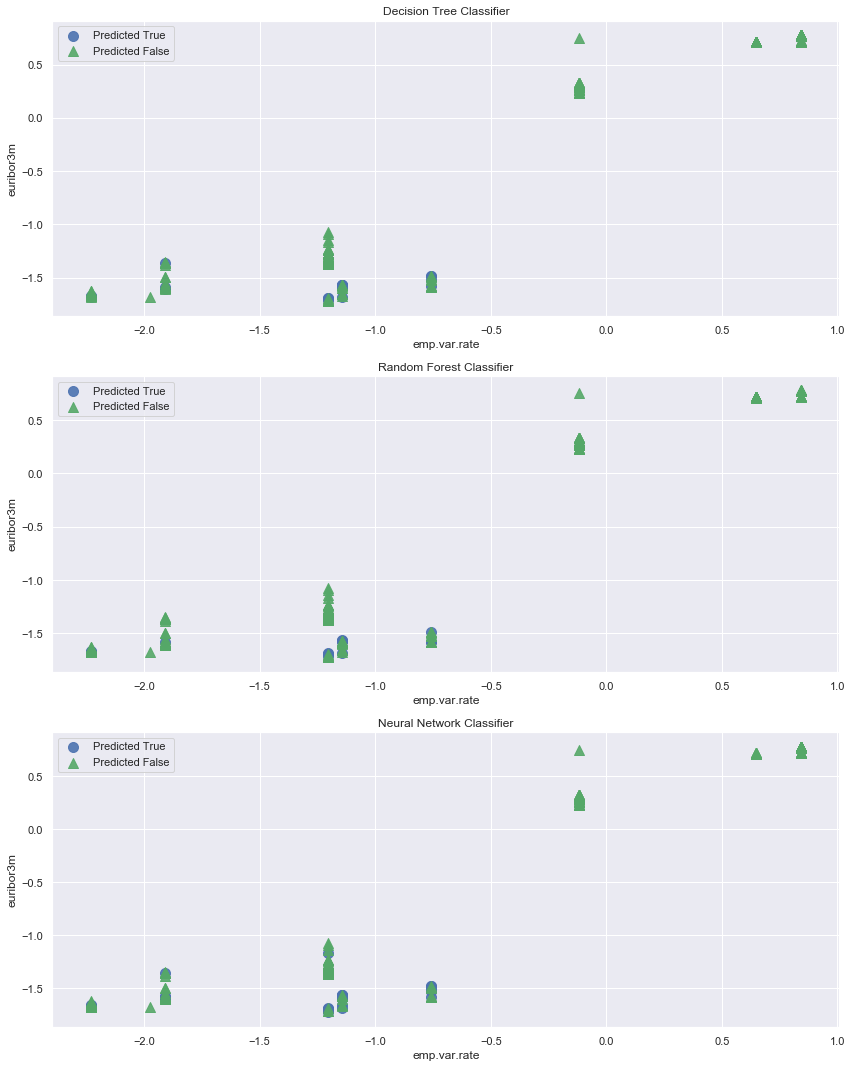

In [ ]:
true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]

plt.figure(figsize=(12, 15))
size = 100
alpha=0.9
x_feature = 'emp.var.rate'
y_feature = 'euribor3m'


true_predictions = X_test[y_pred_dt == 1]
false_predictions = X_test[y_pred_dt == 0]
ax = plt.subplot(3, 1, 1)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Decision Tree Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]
ax = plt.subplot(3, 1, 2)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Random Forest Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[y_pred == 1]
false_predictions = X_test[y_pred == 0]
ax = plt.subplot(3, 1, 3)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Neural Network Classifier')
ax.legend(['Predicted True', 'Predicted False'])

plt.tight_layout()
plt.savefig(os.path.join('1-4- eur and emp features.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


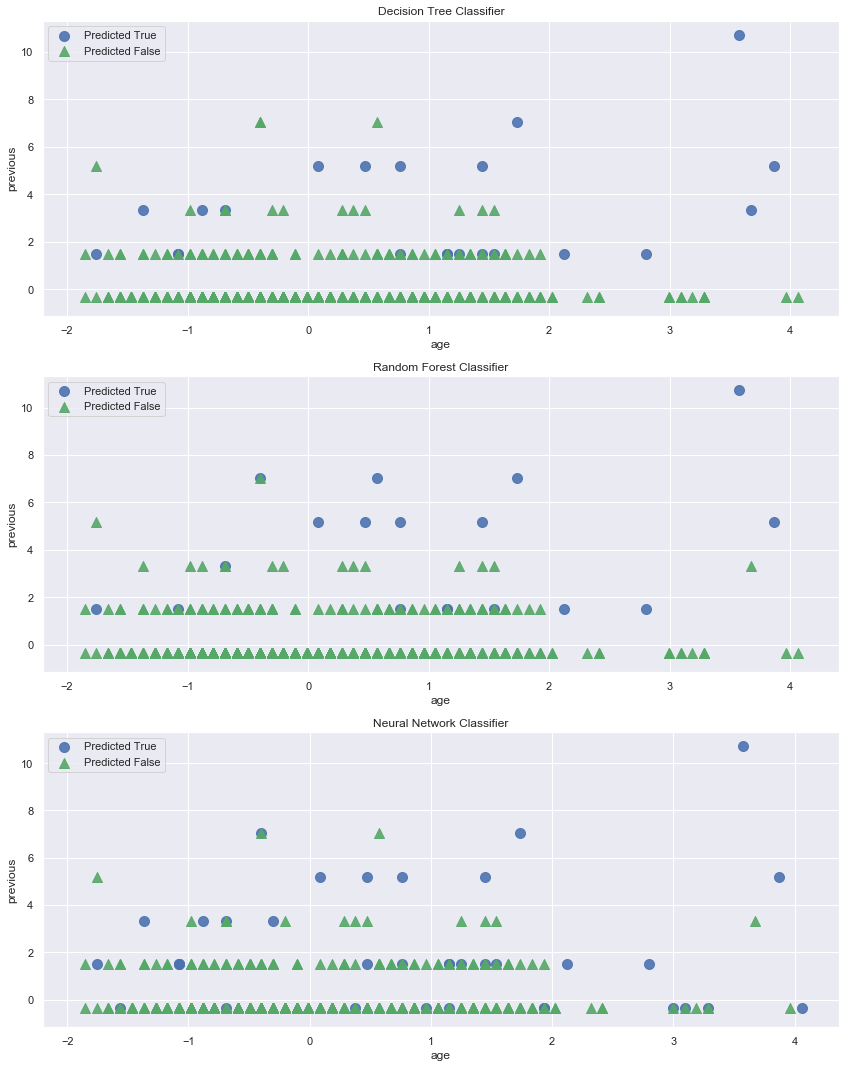

In [ ]:
true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]

plt.figure(figsize=(12, 15))
size = 100
alpha=0.9
x_feature = 'age'
y_feature = 'previous'


true_predictions = X_test[y_pred_dt == 1]
false_predictions = X_test[y_pred_dt == 0]
ax = plt.subplot(3, 1, 1)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Decision Tree Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]
ax = plt.subplot(3, 1, 2)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Random Forest Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[y_pred == 1]
false_predictions = X_test[y_pred == 0]
ax = plt.subplot(3, 1, 3)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Neural Network Classifier')
ax.legend(['Predicted True', 'Predicted False'])

plt.tight_layout()
plt.savefig(os.path.join('1-4-age and previous features.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


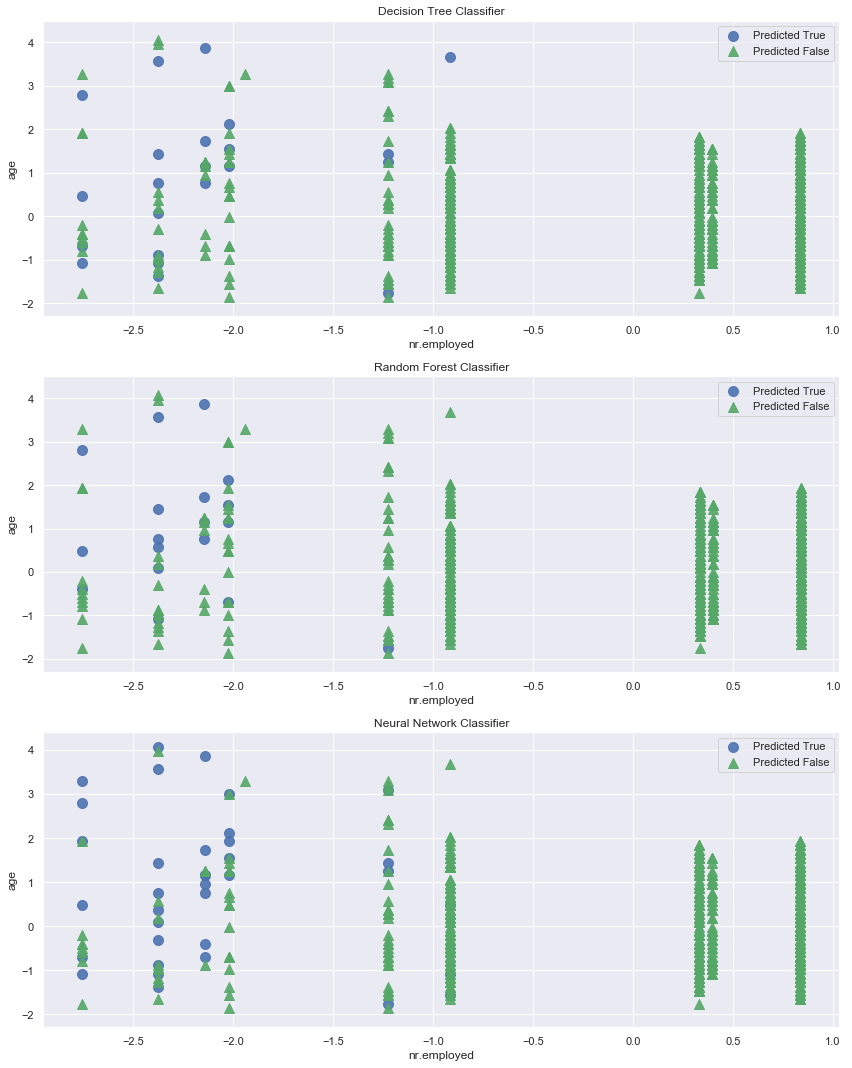

In [ ]:
true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]

plt.figure(figsize=(12, 15))
size = 100
alpha=0.9
x_feature = 'nr.employed'
y_feature = 'age'


true_predictions = X_test[y_pred_dt == 1]
false_predictions = X_test[y_pred_dt == 0]
ax = plt.subplot(3, 1, 1)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Decision Tree Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]
ax = plt.subplot(3, 1, 2)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Random Forest Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[y_pred == 1]
false_predictions = X_test[y_pred == 0]
ax = plt.subplot(3, 1, 3)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Neural Network Classifier')
ax.legend(['Predicted True', 'Predicted False'])

plt.tight_layout()
plt.savefig(os.path.join('1-4-age and nremployed features.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


# V. Produce a table with the true/false positive/negative metrics as well as accuracies

In [ ]:
print("Classification Report for Decision Tree:")
print("Accuracy is ", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print('\n')
print(classification_report(y_test,y_pred_dt))

print("Classification Report for Random Forests:")
print("Accuracy is ", accuracy_score(y_test,RFC_pred)*100)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test,RFC_pred))


print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

Classification Report for Decision Tree:
Accuracy is  89.56310679611651
[[724   8]
 [ 78  14]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.64      0.15      0.25        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.77      0.57      0.59       824
weighted avg       0.87      0.90      0.87       824

Classification Report for Random Forests:
Accuracy is  89.56310679611651
[[726   6]
 [ 80  12]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.67      0.13      0.22        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.78      0.56      0.58       824
weighted avg       0.87      0.90      0.86       824

Classification Report for Neural Network:
Accuracy is  89.32038834951457
[[716  16]
 [ 72  20]]
              precision    recall  f1-score   support

  

In [ ]:
algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
ind = ['Accuracies (%)', 'True Positive', 'False Positive', 'False Negative', 'True Negative']
accuracies = [accuracy_score(y_test,y_pred_dt)*100,accuracy_score(y_test,RFC_pred)*100,accuracy_score(y_true,y_pred)*100]
true_negative = [confusion_matrix(y_test,y_pred_dt)[0][0], confusion_matrix(y_test,RFC_pred)[0][0],confusion_matrix(y_true,y_pred)[0][0]]
false_negative = [confusion_matrix(y_test,y_pred_dt)[1][0],confusion_matrix(y_test,RFC_pred)[1][0], confusion_matrix(y_true,y_pred)[1][0]]
false_positive = [confusion_matrix(y_test,y_pred_dt)[0][1],confusion_matrix(y_test,RFC_pred)[0][1],confusion_matrix(y_true,y_pred)[0][1]]
true_positive = [confusion_matrix(y_test,y_pred_dt)[1][1],confusion_matrix(y_test,RFC_pred)[1][1],confusion_matrix(y_true,y_pred)[1][1]]

arr1 = np.array([accuracies, true_positive,false_positive,false_negative,true_negative]) 
table_1 = pd.DataFrame(arr1, index = ind, columns = algorithms)

table_1

,Decision Tree,Random Forest,Neural Network
Accuracies (%),89.563107,89.563107,89.320388
True Positive,14.000000,12.000000,20.000000
False Positive,8.000000,6.000000,16.000000
False Negative,78.000000,80.000000,72.000000
True Negative,724.000000,726.000000,716.000000


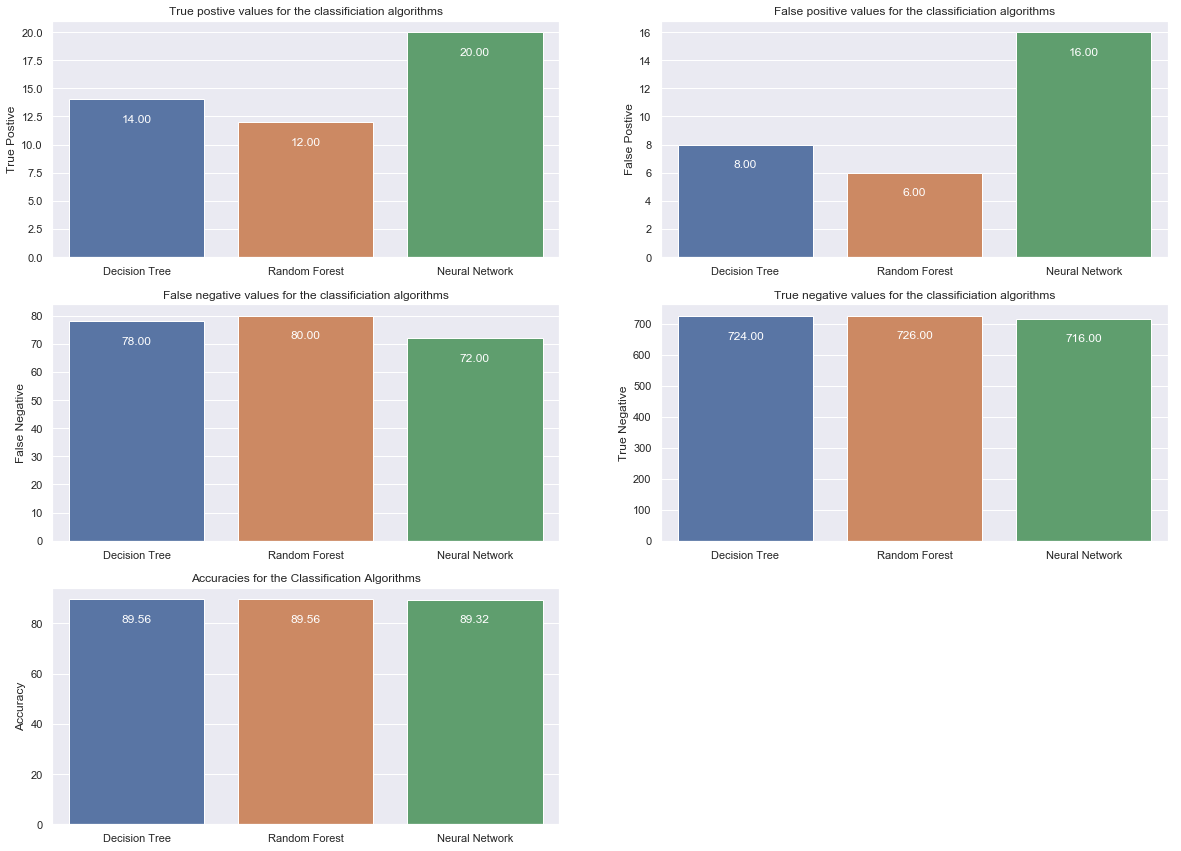

In [ ]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
dt_trueP = confusion_matrix(y_test,y_pred_dt)[1][1]
rf_trueP = confusion_matrix(y_test,RFC_pred)[1][1]
nn_trueP = confusion_matrix(y_true,y_pred)[1][1]
trueP = [dt_trueP,rf_trueP,nn_trueP]
 

plt.subplot(4, 2, 1) 
ax = sns.barplot(x_axis,trueP)
ax.set(ylabel ='True Postive', title='True postive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white',  xytext=(0, -20), textcoords='offset points') 

# plot False pOsitives
dt_falseP = confusion_matrix(y_test,y_pred_dt)[0][1]
rf_falseP = confusion_matrix(y_test,RFC_pred)[0][1]
nn_falseP = confusion_matrix(y_true,y_pred)[0][1]
falseP = [dt_falseP,rf_falseP,nn_falseP]
 
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,falseP)
ax.set(ylabel ='False Postive', title='False positive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points') 

# plot False Negatives
dt_falseN = confusion_matrix(y_test,y_pred_dt)[1][0]
rf_falseN = confusion_matrix(y_test,RFC_pred)[1][0]
nn_falseN = confusion_matrix(y_true,y_pred)[1][0]
falseN = [dt_falseN,rf_falseN,nn_falseN]
 
plt.subplot(4, 2, 3)
ax = sns.barplot(x_axis,falseN)
ax.set(ylabel ='False Negative', title='False negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')


# plot True Negatives

dt_trueN = confusion_matrix(y_test,y_pred_dt)[0][0]
rf_trueN = confusion_matrix(y_test,RFC_pred)[0][0]
nn_trueN = confusion_matrix(y_true,y_pred)[0][0]
trueN = [dt_trueN,rf_trueN,nn_trueN]

plt.subplot(4, 2, 4) 
ax = sns.barplot(x_axis,trueN)
ax.set(ylabel ='True Negative', title='True negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')



# plot Accurcacy
dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 

 

plt.subplot(4, 2, 5)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for the Classification Algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')
        
plt.savefig(os.path.join('barcharts_algorithms.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()





### 1. Handling imbalanced data using Up-sample Minority Class

In [ ]:
# https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample
# Separate majority and minority classes
df1_majority = df[df['y']==0]
df1_minority = df[df['y']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df1_minority, replace=True, n_samples=3668, random_state=99)     
# replace=True as it is sample with replacement
# n_samples is the target number of samples after the Up-sampling to match majority class
# random_state=99 for reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df1_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['y'].value_counts() 
# The new df has more observations than the original, and the ratio of the two classes is now 1:1
# 3668 observations for both classe

#print( np.unique(y_pred_dt ) )

1    3668
0    3668
Name: y, dtype: int64

### Train Test Split with the new Upsampled Dataframe

In [ ]:
X_up = df_upsampled.drop('y',axis=1)
y_up = df_upsampled['y']
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up,y_up, test_size=0.20,random_state=101)

#Normalize the upsampled data and then split for NN
scaler = StandardScaler()
scaler.fit(df_upsampled.drop('y',axis=1))
scaled_features_up = scaler.transform(df_upsampled.drop('y',axis=1))

df_feat_up = pd.DataFrame(scaled_features_up,columns=df_upsampled.columns[:-1])

X_nn_up = df_feat_up.loc[:,]
y_nn_up = df_upsampled['y']
X_train_nn_up, X_test_nn_up, y_train_nn_up, y_test_nn_up = train_test_split(X_nn_up,y_nn_up, test_size=0.20,random_state=101)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Training/Testing Decision Trees, Random Forests, and Neural Networks

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_up,y_train_up)  
dtree_pred = dtree.predict(X_test_up)

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train_up, y_train_up)
rfc_pred = rfc.predict(X_test_up)

clf_up =MLPClassifier(max_iter=1000,random_state=101)
clf_up.fit(X_train_nn_up, y_train_nn_up)
clf_pred = clf_up.predict(X_test_nn_up)

### Checking accurancy change after Up-sample Minority Class

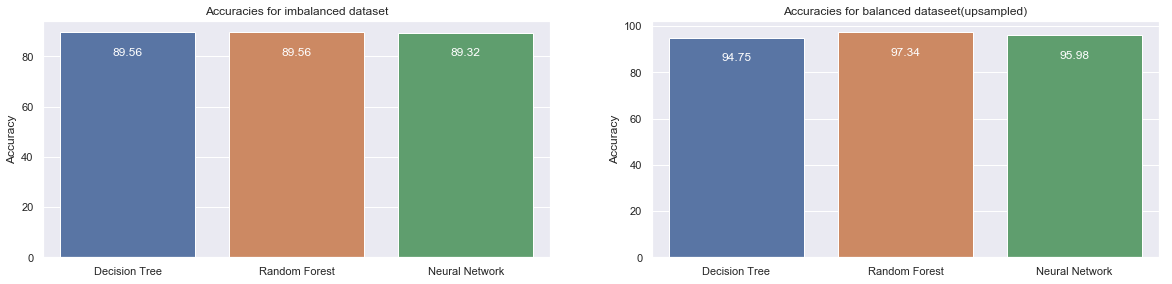

In [ ]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
# accuracy before up-sample

dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 
plt.subplot(4, 2, 1)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for imbalanced dataset',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

# plot Accurcacy after upsample
dt_accuracy_up = accuracy_score(y_test_up,dtree_pred)*100
rf_accuracy_up = accuracy_score(y_test_up,rfc_pred)*100
nn_accuracy_up = accuracy_score(y_test_up,clf_pred)*100
performance = [dt_accuracy_up,rf_accuracy_up,nn_accuracy_up]
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for balanced dataseet(upsampled)',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')
        
plt.savefig(os.path.join('1-7-barcharts_up.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


### 2. Handling imbalanced data using down-sample Minority Class

In [ ]:
# Separate majority and minority classes
df2_majority = df[df['y']==0]
df2_minority = df[df['y']==1]
 
# Downsample majority class
df2_majority_downsampled = resample(df2_majority, replace=False, n_samples=451, random_state=99)   
# replace=False sample without replacement, n_samples=49,     
# n_samples is the target number of samples after the Down-sampling to match minority class            
# random_state=99 for reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df2_majority_downsampled, df2_minority])
 
# Display new class counts
df_downsampled['y'].value_counts()
# The new df has less observations than the original, and the ratio of the two classes is now 1:1
# 451 observations for both classes

1    451
0    451
Name: y, dtype: int64

### Train Test Split with the new downsampled Dataframe

In [ ]:
X_dn = df_downsampled.drop('y',axis=1)
y_dn = df_downsampled['y']
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn,y_dn, test_size=0.20,random_state=101)

#Normalize the upsampled data and then split for NN
scaler = StandardScaler()
scaler.fit(df_downsampled.drop('y',axis=1))
scaled_features_dn = scaler.transform(df_downsampled.drop('y',axis=1))

df_feat_dn = pd.DataFrame(scaled_features_dn,columns=df_downsampled.columns[:-1])

X_nn_dn = df_feat_dn.loc[:,]
y_nn_dn = df_downsampled['y']
X_train_nn_dn, X_test_nn_dn, y_train_nn_dn, y_test_nn_dn = train_test_split(X_nn_dn,y_nn_dn, test_size=0.20,random_state=101)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Training/Testing Decision Trees, Random Forests, and Neural Networks

In [ ]:
#using already tuned DT
dtree_dn = clf_gini.fit(X_train_dn, y_train_dn)
dtree_pred_dn = dtree_dn.predict(X_test_dn)
#USING ALREADY TUNED RFC
rfc_dn= RFC.fit(X_train_dn, y_train_dn)
rfc_pred_dn = rfc_dn.predict(X_test_dn)
# used default parameters for NN
mlp_dn = MLPClassifier(max_iter=1000,random_state=101)
clf_dn = mlp_dn.fit(X_train_nn_dn,y_train_nn_dn)
clf_pred_dn = clf_dn.predict(X_test_nn_dn)

### Checking accurancy change after downsample Minority Class

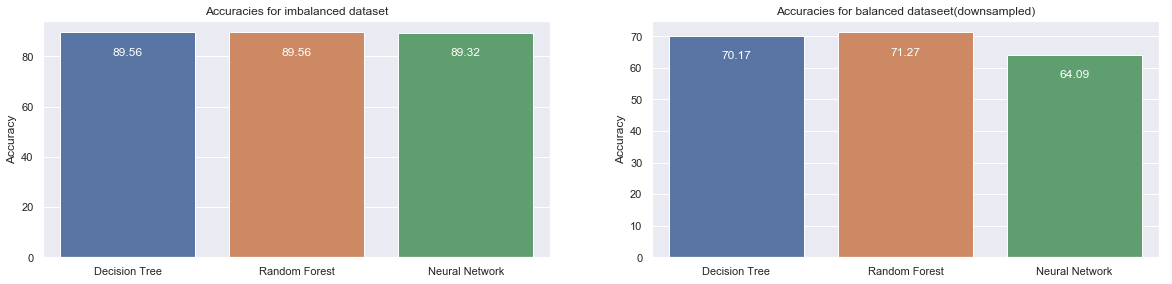

In [ ]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
# accuracy before up-sample

dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 
plt.subplot(4, 2, 1)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for imbalanced dataset',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

# plot Accurcacy after upsample
dt_accuracy_up = accuracy_score(y_test_dn,dtree_pred_dn)*100
rf_accuracy_up = accuracy_score(y_test_dn,rfc_pred_dn)*100
nn_accuracy_up = accuracy_score(y_test_nn_dn,clf_pred_dn)*100
performance = [dt_accuracy_up,rf_accuracy_up,nn_accuracy_up]
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for balanced dataseet(downsampled)',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')
        
plt.savefig(os.path.join('1-7-barcharts_dn.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


# Question 2: Parameter Selection and Classification (for dataset B)

# 1. Data loading and preprocessing using the Z-score normalization 

In [ ]:
dataB = pd.read_csv('DataDNA.csv', sep = ',', header= None)
df2 = pd.DataFrame(dataB)
print(df2.shape)
df2.head(10)

(2200, 58)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,1,2,1,3,4,2,1,2,2,2,1,1,2,3,1,4,2,2,1,4,2,2,1,4,2,2,1,2,1,1,2,2,1,4,2,3,3,4,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,2,2,1,2,4,4,3,2,1,2,1,3,3,1,2,3,3,4,2,1,3,3,1,1,3,1,4,2,2,4,2,1,1,1,3,3,3,3,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,4,2,2,1,3,4,2,2,2,1,1,1,1,1,3,1,4,3,1,1,3,4,3,3,4,2,1,1,2,4,4,1,2,1,1,1,4,1,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,2,3,4,2,2,3,3,3,3,4,3,4,2,3,3,4,4,1,2,2,1,1,4,3,1,4,4,4,4,4,1,1,4,1,1,4,2,2,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,1,3,4,4,4,3,1,3,1,4,4,4,3,4,4,4,3,1,2,2,1,1,4,1,1,3,1,4,4,2,3,3,1,1,1,3,2,4,3,1,3,2,1,4,2,1,1,-1
5,3,2,3,1,2,3,4,3,1,4,3,4,3,3,1,1,3,1,4,2,2,1,3,1,4,4,2,1,3,2,4,2,3,2,1,3,3,3,3,3,1,2,2,1,3,3,1,1,2,2,2,3,4,2,2,2,2,-1
6,4,2,1,4,2,4,4,4,2,3,3,4,3,3,2,3,3,3,4,2,3,3,4,2,3,4,3,4,2,3,4,2,2,4,3,4,4,3,1,4,3,3,4,3,1,4,1,4,4,3,3,4,2,2,1,2,4,1
7,3,3,4,3,1,3,4,3,4,1,4,4,3,1,1,4,2,4,3,1,3,1,1,2,1,1,1,4,2,1,3,2,3,1,1,2,1,2,3,3,4,1,4,2,4,1,4,2,4,2,2,1,1,4,3,3,1,1
8,1,3,4,3,3,1,1,4,2,1,1,4,4,4,4,3,4,2,4,1,1,4,4,2,3,4,2,1,3,3,3,1,1,2,1,2,2,1,1,1,3,1,3,4,3,4,1,2,2,1,3,2,2,2,2,1,1,1
9,1,3,1,1,3,1,1,2,1,1,1,3,3,4,3,3,4,1,4,2,3,1,2,1,4,2,2,2,3,3,4,4,1,1,1,4,1,3,2,2,3,4,2,2,4,2,2,1,2,4,2,2,2,1,1,3,1,1


In [ ]:
print(df2.isnull().sum().sum())
# df2.iloc[:,:-1].head()
print(df2.shape)
df2.head()

0
(2200, 58)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,1,2,1,3,4,2,1,2,2,2,1,1,2,3,1,4,2,2,1,4,2,2,1,4,2,2,1,2,1,1,2,2,1,4,2,3,3,4,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,2,2,1,2,4,4,3,2,1,2,1,3,3,1,2,3,3,4,2,1,3,3,1,1,3,1,4,2,2,4,2,1,1,1,3,3,3,3,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,4,2,2,1,3,4,2,2,2,1,1,1,1,1,3,1,4,3,1,1,3,4,3,3,4,2,1,1,2,4,4,1,2,1,1,1,4,1,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,2,3,4,2,2,3,3,3,3,4,3,4,2,3,3,4,4,1,2,2,1,1,4,3,1,4,4,4,4,4,1,1,4,1,1,4,2,2,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,1,3,4,4,4,3,1,3,1,4,4,4,3,4,4,4,3,1,2,2,1,1,4,1,1,3,1,4,4,2,3,3,1,1,1,3,2,4,3,1,3,2,1,4,2,1,1,-1


In [ ]:
df2[57].value_counts()

 1    1137
-1    1063
Name: 57, dtype: int64

In [ ]:
# df2[57] = df2[57].map({1: 1, -1: 0})

In [ ]:
df2[57].head()

0    1
1    1
2    1
3   -1
4   -1
Name: 57, dtype: int64

In [ ]:
# # Z-score normalized values
normalized_df = df2.iloc[:,:-1]
std_scale = preprocessing.StandardScaler().fit(normalized_df)
df_std = std_scale.transform(normalized_df)
df_zscore = pd.DataFrame(df_std)
df_zscore.columns =  normalized_df.columns
df_zscore.head()

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-1.352898,-0.487479,-1.372441,-0.470994,-1.431156,-0.448281,0.405564,0.415676,0.396645,0.392611,-1.454242,-0.500168,-1.369434,0.381451,1.253160,-0.579766,-1.471189,-0.599369,-0.583351,-0.598913,-1.437523,-1.477642,-0.611451,0.332324,-1.495711,1.418861,-0.570943,0.015762,-1.448819,1.821169,-0.776737,-0.237862,-1.131068,1.535688,-0.569710,-0.376354,-1.395430,-0.483853,-1.401924,-1.399702,-0.496609,-0.455196,-1.402111,1.391803,-0.432450,0.472744,0.497988,1.424712,0.453914,-0.464630,0.513026,1.383572,-0.452656,-0.400135,-0.458416,-0.417566,-1.392249
1,0.459203,0.433082,1.360021,-0.470994,-1.431156,-0.448281,-0.495689,1.322008,0.396645,-0.509943,-0.530114,-0.500168,-1.369434,-0.549950,1.253160,1.232002,0.325434,-0.599369,-1.475822,-0.598913,-1.437523,0.346607,0.307396,-1.488629,-0.600319,0.496979,0.392304,1.749605,-0.318134,-1.360333,0.082831,0.675396,-1.131068,-1.391967,0.324910,-1.292259,1.360356,-0.483853,-0.477671,1.376149,-0.496609,-1.391112,-1.402111,-1.357643,0.493928,0.472744,0.497988,0.490475,-1.356803,1.404083,0.513026,1.383572,1.424521,1.435731,-1.374415,0.497419,1.369651
2,1.365253,-1.408039,1.360021,1.317075,1.342890,1.371309,-1.396943,-1.396986,-0.491065,-1.412496,1.318143,-0.500168,-0.476237,-1.481351,0.343575,1.232002,-0.572878,-0.599369,-0.583351,-1.505108,-1.437523,-1.477642,-1.530297,-1.488629,0.295072,-1.346787,1.355552,0.882684,-1.448819,-1.360333,0.082831,1.588655,0.627483,0.559803,1.219529,-0.376354,-1.395430,-1.404680,-0.477671,1.376149,1.367795,-1.391112,-0.485426,-1.357643,-1.358828,-1.361537,1.414020,-1.378000,-1.356803,-0.464630,-1.316240,-1.376046,1.424521,-0.400135,-0.458416,1.412405,1.369651
3,-1.352898,1.353642,-1.372441,-1.365028,0.418208,0.461514,1.306817,1.322008,0.396645,1.295164,-0.530114,0.400298,1.310158,-0.549950,-0.566010,0.326118,0.325434,0.311904,0.309119,1.213478,0.364500,1.258732,-0.611451,0.332324,0.295072,1.418861,1.355552,-0.851159,-0.318134,-0.299832,-1.636305,-1.151121,1.506759,0.559803,-1.464329,1.455456,1.360356,1.357802,1.370835,1.376149,-1.428812,-1.391112,1.347943,-1.357643,-1.358828,1.389885,-0.418044,-0.443763,-1.356803,0.469726,0.513026,1.383572,-1.391244,0.517798,0.457583,1.412405,-0.471615
4,0.459203,1.353642,1.360021,0.423041,-1.431156,-1.358075,1.306817,1.322008,1.284354,-1.412496,-1.454242,0.400298,1.310158,1.312852,1.253160,0.326118,-1.471189,0.311904,-1.475822,1.213478,1.265512,1.258732,0.307396,1.242800,1.190464,1.418861,0.392304,-0.851159,-0.318134,-0.299832,-1.636305,-1.151121,1.506759,-1.391967,-1.464329,0.539551,-1.395430,1.357802,1.370835,-0.474418,0.435593,0.480721,-1.402111,-1.357643,-1.358828,0.472744,-0.418044,1.424712,0.453914,-1.398986,0.513026,-0.456173,-1.391244,1.435731,-0.458416,-1.332552,-1.392249


# 2.Parameter Selection: 

# a) K-NN

For k= 1, Accuracies: [0.69902913 0.69480519 0.69155844 0.72077922 0.72312704]
For k= 3, Accuracies: [0.70226537 0.73376623 0.70779221 0.73701299 0.71661238]
For k= 5, Accuracies: [0.72815534 0.73376623 0.75       0.72402597 0.71009772]
For k= 7, Accuracies: [0.73786408 0.74675325 0.72727273 0.73051948 0.70032573]
For k= 9, Accuracies: [0.74757282 0.75324675 0.73376623 0.72402597 0.6970684 ]
For k= 11, Accuracies: [0.75728155 0.76298701 0.71103896 0.73051948 0.6970684 ]
For k= 13, Accuracies: [0.73786408 0.77272727 0.71103896 0.74350649 0.71335505]
For k= 15, Accuracies: [0.72815534 0.75324675 0.73701299 0.75324675 0.71986971]
For k= 17, Accuracies: [0.72168285 0.75324675 0.72727273 0.76298701 0.71335505]
For k= 19, Accuracies: [0.72168285 0.73701299 0.72077922 0.75       0.70358306]
For k= 21, Accuracies: [0.71197411 0.75       0.70779221 0.75649351 0.69381107]
For k= 23, Accuracies: [0.68932039 0.74675325 0.71103896 0.76298701 0.70684039]
For k= 25, Accuracies: [0.69255663 0.75974026

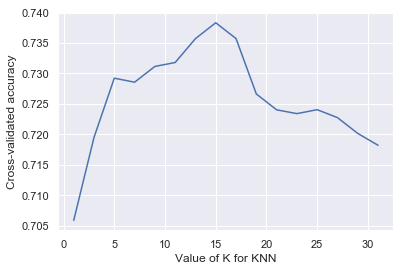

In [ ]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# 5-fold cross-validation with k = [1, 3, 5, 7, 31] for KNN (the n_neighbors parameter)
k = list(range(1,32,2))
k_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print("For k= {}, Accuracies: {}".format(i, scores))
    

print('\n')
print('Mean of accuracy scores:', k_scores)
print('\n')
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

plt.plot(k, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
# plt.title('')
plt.savefig(os.path.join('2-2-a-kNN.png'), dpi=300, format='png', bbox_inches='tight')



#ref: https://www.ritchieng.com/machine-learning-cross-validation/

# b) SVM (RBF Kernel)

In [ ]:
model = SVC()
param_grid = {'C': [0.1, 0.5, 1, 2, 5,10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,refit=True)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 10, 'gamma': 0.01}

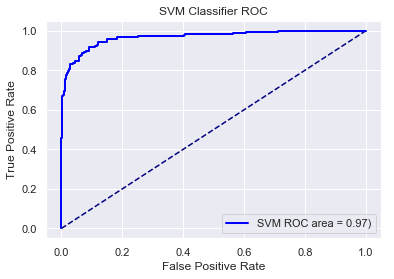

In [ ]:
#SVM GATHER DATA
rbf_svc = SVC(kernel='rbf', gamma=0.01, C=10,probability=True).fit(X_train,y_train)

#PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
predictedprobSVC = rbf_svc.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, 1.0]
#plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.savefig(os.path.join('2-2-b-svm.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#ref :https://medium.com/datadriveninvestor/computing-an-roc-graph-with-python-a3aa20b9a3fb

# 3. Training classifiers and reporting the results:

# a) Classifying the test set using k-NN, SVM, Random Forests, and Neural Network

In [ ]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

Knn and SVM with chosen parameters from part 2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)

In [ ]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

In [ ]:
print("Classification Report for k-NN:")
print("Accuracy is ", accuracy_score(y_test,knn_pred)*100)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

print("Classification Report for SVM:")
print("Accuracy is ", accuracy_score(y_test,svm_pred)*100)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Classification Report for k-NN:
Accuracy is  75.75757575757575
[[313  24]
 [136 187]]


              precision    recall  f1-score   support

          -1       0.70      0.93      0.80       337
           1       0.89      0.58      0.70       323

   micro avg       0.76      0.76      0.76       660
   macro avg       0.79      0.75      0.75       660
weighted avg       0.79      0.76      0.75       660

Classification Report for SVM:
Accuracy is  90.75757575757576
[[310  27]
 [ 34 289]]
              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       337
           1       0.91      0.89      0.90       323

   micro avg       0.91      0.91      0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



Random Forest and Neural Network classifiers with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=42)
nn_mlp = MLPClassifier(random_state=42)

In [ ]:
rfc.fit(X_train, y_train)
nn_mlp.fit(X_train, y_train)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)
nn_mlp_pred = nn_mlp.predict(X_test)

In [ ]:
print("Classification Report for Random Forests: ")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))


Classification Report for Random Forests: 
Accuracy is  94.6969696969697
[[329   8]
 [ 27 296]]


              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       337
           1       0.97      0.92      0.94       323

   micro avg       0.95      0.95      0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660

Classification Report for Neural Network:
Accuracy is  90.45454545454545
[[308  29]
 [ 34 289]]
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       337
           1       0.91      0.89      0.90       323

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



# b) Exploring parameters for Random Forest and Neural Network

Random Forests

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9463348981635447

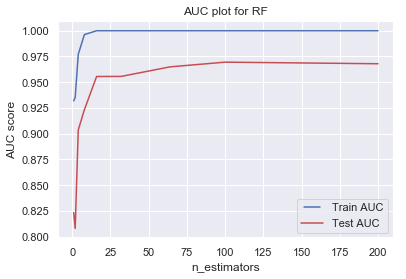

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

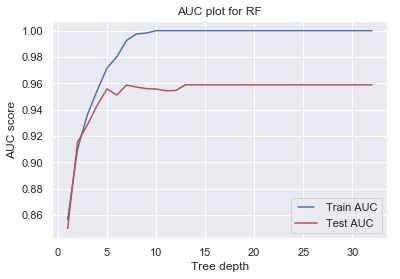

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_estimators=25, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(Treedepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [ ]:
rfc_tuned = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=13)

In [ ]:
rfc_tuned = rfc_tuned.fit(X_train, y_train)
rfc_tuned_pred = rfc_tuned.predict(X_test)

In [ ]:
print("Results from the default parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tuned parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_tuned_pred)*100)
print(confusion_matrix(y_test,rfc_tuned_pred))
print(classification_report(y_test,rfc_tuned_pred))

Results from the default parameters for Random forests:
Accuracy is  94.6969696969697
[[329   8]
 [ 27 296]]


              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       337
           1       0.97      0.92      0.94       323

   micro avg       0.95      0.95      0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



Results from the tuned parameters for Random forests:
Accuracy is  96.96969696969697
[[330   7]
 [ 13 310]]
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       337
           1       0.98      0.96      0.97       323

   micro avg       0.97      0.97      0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



### Neural Network

In [ ]:
nn_mlp = MLPClassifier(random_state=42)
nn_mlp.fit(X_train, y_train)
nn_mlp_pred = nn_mlp.predict(X_test)

In [ ]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(57,57,57), (57,57),(57,30,10)], # (57,57,30,20,5)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'random_state': [42],
    'batch_size': [70, 200]
}

In [ ]:
nn_mlp_tuned = GridSearchCV(nn_mlp, parameter_space, n_jobs=-1, cv=5, refit=True)
nn_mlp_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [2000], 'hidden_layer_sizes': [(57, 57, 57), (57, 57), (57, 30, 10)], 'activation': ['tanh', 'relu', 'logistic'], 'solver': ['sgd', 'adam', 'lbfgs'], 'alpha': [0.0001, 0.05], 'random_state': [42], 'batch_size': [70, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# Best parameter set
print('Best parameters found:\n', nn_mlp_tuned.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'batch_size': 70, 'hidden_layer_sizes': (57, 57), 'max_iter': 2000, 'random_state': 42, 'solver': 'adam'}


In [ ]:
nn_mlp_tuned1 = MLPClassifier(activation = nn_mlp_tuned.best_params_['activation'],
                       alpha = nn_mlp_tuned.best_params_['alpha'], 
#                        learning_rate= nn_mlp_tuned.best_params_['learning_rate'], 
                       solver = nn_mlp_tuned.best_params_['solver'], 
                       random_state = nn_mlp_tuned.best_params_['random_state'], 
                       hidden_layer_sizes = nn_mlp_tuned.best_params_['hidden_layer_sizes'],
                       batch_size = nn_mlp_tuned.best_params_['batch_size'],
                       max_iter = nn_mlp_tuned.best_params_['max_iter'],
#                        early_stopping = True,
                             )
print(nn_mlp_tuned1)

nn_mlp_tuned1.fit(X_train, y_train)
y_true, y_pred = y_test, nn_mlp_tuned1.predict(X_test)

print("Results from the default parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))
print("\n")
print("Results from the tunned parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

MLPClassifier(activation='relu', alpha=0.05, batch_size=70, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(57, 57), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Results from the default parameters for the neural network:
Accuracy is  90.45454545454545
[[308  29]
 [ 34 289]]
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       337
           1       0.91      0.89      0.90       323

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



Results from the tunned parameters for the neural network:
Accuracy is  91.81818181818183
[[314  23]
 [ 31 

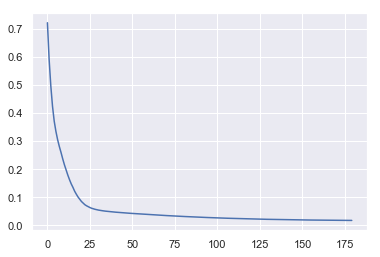

In [ ]:
plt.plot(nn_mlp_tuned1.loss_curve_)

# C) Varying the split of the training-test set

In [ ]:
from sklearn.model_selection import KFold
import time

def cross_validate_model(X, y, clf, n_splits):
    #define 10-fold cross validation test harness
    kfold = KFold(n_splits=n_splits, shuffle=True)
    results = []
    count = 1
    for _ in range(20):
        for train, test in kfold.split(X, y):
            count += 1
            
            
            t0 = time.time()
            model = clf.fit(X[train], y[train])
            t1 = time.time()
            y_pred = model.predict(X[test])
            t2 = time.time()

            classification_time = round(t2-t1, 3) # Classification time rounded to 3 decimal in seconds
            training_time = round(t1-t0, 3) # Classification time rounded to 3 decimal in seconds
            precision,recall,fscore,support = score( y[test],y_pred,average='macro')
            accuracy = accuracy_score(y[test],y_pred)
            results.append([accuracy, precision, recall, fscore, support, training_time, classification_time, n_splits])
    
    result_data = pd.DataFrame(results)
    result_data.columns = ["accuracy", "precision", "recall", "fscore", "support", "training_time", "classification_time", "num_folds"]
    
    return result_data

### KNN Run Kfold for 4,5,6,7 folds 20 times each
#1

In [ ]:
np.random.seed(40)
knn = KNeighborsClassifier(n_neighbors=15)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, knn, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
data.groupby(['num_folds']).agg(f)

accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.745864  0.023114  0.808710  0.013763  0.753512  0.018404   
5          0.748864  0.024771  0.811162  0.017760  0.756567  0.019308   
6          0.749138  0.022607  0.810598  0.014659  0.756590  0.019838   
7          0.749615  0.024383  0.811470  0.017244  0.757170  0.019821   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.735450  0.024561      0.003663  0.000655            0.078737   
5          0.738834  0.025422      0.003870  0.000646            0.065730   
6          0.738984  0.024429      0.004100  0.000640            0.056383   
7          0.739602  0.025480      0.004179  0.000732            0.050071   

                     
                std  
num_folds            
4          0.005182  
5          0.005216  
6          0.003016  
7          0.002184

### SVM Run Kfold for 4,5,6,7 folds 20 times each
#2

In [ ]:
np.random.seed(40)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, svm, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
data.groupby(['num_folds']).agg(f)

accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.904977  0.009886  0.905068  0.009814  0.905459  0.010072   
5          0.906591  0.013718  0.906716  0.013808  0.907089  0.013772   
6          0.908980  0.013963  0.909205  0.013704  0.909547  0.013829   
7          0.908477  0.015045  0.908656  0.014887  0.909214  0.015080   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.904802  0.009929      0.136550  0.007715            0.029375   
5          0.906390  0.013799      0.154630  0.008387            0.024990   
6          0.908782  0.013958      0.166458  0.008687            0.021308   
7          0.908318  0.015047      0.176264  0.010253            0.018586   

                     
                std  
num_folds            
4          0.001435  
5          0.001667  
6          0.001454  
7          0.001541

### Random Forest Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS** #3

In [ ]:
np.random.seed(40)
rfc = RandomForestClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, rfc, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

Third classifier: Results from random forests(default parameters)


accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.931705  0.011215  0.933171  0.010612  0.932839  0.011263   
5          0.935500  0.011552  0.936539  0.011329  0.936623  0.011228   
6          0.933363  0.014262  0.934647  0.013498  0.934581  0.013813   
7          0.935523  0.015066  0.936697  0.014821  0.936593  0.014565   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.931581  0.011305      0.020400  0.006153            0.001738   
5          0.935387  0.011577      0.019870  0.001529            0.001550   
6          0.933234  0.014311      0.020475  0.001572            0.001467   
7          0.935404  0.015075      0.020900  0.001495            0.001421   

                     
                std  
num_folds            
4          0.000545  
5          0.000557  
6          0.000517  
7          0.000537

### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS** #4

In [ ]:
np.random.seed(40)
nn_mlp = MLPClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

### Random Forest Classifier Run Kfold for 4,5,6,7 folds 20 times each
**TUNED PARAMETERS** #5

In [ ]:
np.random.seed(40)
rfc_tuned = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=13)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, rfc_tuned, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Fifth classifier: Random Forest (tuned paramters)")
data.groupby(['num_folds']).agg(f)

### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**Tuned PARAMETERS** #6

In [ ]:
np.random.seed(40)
nn_mlp_tuned2 = MLPClassifier(activation = nn_mlp_tuned.best_params_['activation'],
                       alpha = nn_mlp_tuned.best_params_['alpha'], 
#                        learning_rate= nn_mlp_tuned.best_params_['learning_rate'], 
                       solver = nn_mlp_tuned.best_params_['solver'], 
                       random_state = nn_mlp_tuned.best_params_['random_state'], 
                       hidden_layer_sizes = nn_mlp_tuned.best_params_['hidden_layer_sizes'],
                       batch_size = nn_mlp_tuned.best_params_['batch_size'],
                       max_iter = nn_mlp_tuned.best_params_['max_iter'],
#                        early_stopping = True,
                             )
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp_tuned2, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Sixth classifier: Neural Network (tuned paramter)")
data.groupby(['num_folds']).agg(f)